In [94]:
# TASK 1
# Importing given url data which is data set of titanic ship
import pandas as pd

Data_titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

print (Data_titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB
None


male      843
female    466
Name: sex, dtype: int64


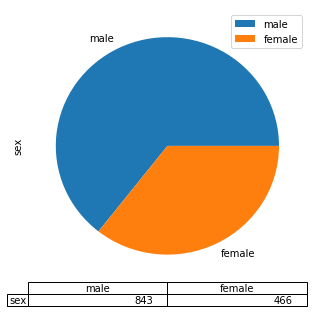

In [96]:
# Creating a Pie Chart presenting the Male and Female proportion ...

import matplotlib.pyplot as plt

Data_f_m = Data_titanic['sex']

print (Data_f_m.value_counts())

Data_f_m.value_counts().plot(kind='pie',legend =True,table=True,figsize=(5,5))


['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
       fare      age
0  211.3375  29.0000
1  151.5500   0.9167
2  151.5500   2.0000
3  151.5500  30.0000
4  151.5500  25.0000


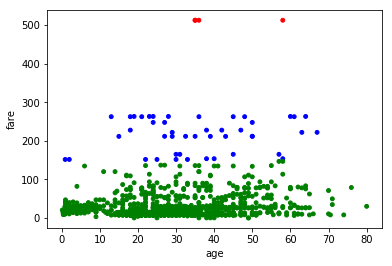

In [97]:
# Create a scatterplot with the fare paid and the Age, differ the plot color by gender
print (list(Data_titanic))
import numpy as np
Data_fair_age = Data_titanic[['fare','age']]
Data_titanic.age.fillna(method='ffill')

print (Data_fair_age.head())
Data_fair_age.fillna(method='backfill')
colors = np.where(Data_fair_age.fare < 100, '*','o')
col = []

for j in Data_fair_age.fare:
    if j <150:
        col.append('g')

    elif j < 300:
        col.append('b')

    else:
        col.append('r')

        
Data_fair_age.plot(kind='scatter', x='age', y='fare',c=col,s=15,marker="o",legend=True)


In [165]:
### TASK 2
# GIVEN Data Set 
import numpy as np
Data_given_df = pd.DataFrame({"From_To":["LoNDon_paris","MAdrid_MiLAN","londON_StockhOlm","Budapest_PaRis","Brussels_londOn"],
                       "FlightNumber":[10045,np.nan,10065,np.nan,10085],
                       "RecentDelays":[[23,47],[],[24,43,87],[13],[67,32]],
                       "Airline":['KLM(!)',"<Air France>(12)","(British Airways.)","12.Air France","SwissAir"]})

print (Data_given_df)


            From_To  FlightNumber  RecentDelays             Airline
0      LoNDon_paris       10045.0      [23, 47]              KLM(!)
1      MAdrid_MiLAN           NaN            []    <Air France>(12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways.)
3    Budapest_PaRis           NaN          [13]       12.Air France
4   Brussels_londOn       10085.0      [67, 32]            SwissAir


In [166]:
# Task 2 :- Question :- 1. Some Value in FlightNumber column are missing. These numbers are meant to increase by 10 with each 
#so 10055 and 10075 need to be put in place. Fill in thesse missing number and make the column as intger column instead of float

Data_given_df.FlightNumber = Data_given_df.FlightNumber.interpolate()
Data_given_df.FlightNumber = Data_given_df.FlightNumber.astype(int)
print (Data_given_df)
print (Data_given_df.info())




            From_To  FlightNumber  RecentDelays             Airline
0      LoNDon_paris         10045      [23, 47]              KLM(!)
1      MAdrid_MiLAN         10055            []    <Air France>(12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways.)
3    Budapest_PaRis         10075          [13]       12.Air France
4   Brussels_londOn         10085      [67, 32]            SwissAir
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
From_To         5 non-null object
FlightNumber    5 non-null int32
RecentDelays    5 non-null object
Airline         5 non-null object
dtypes: int32(1), object(3)
memory usage: 220.0+ bytes
None


In [167]:
# Task 2 :-  Question 2 :- The From_To Column would be better as two separete columns
# Split each string on the underscore delimiter '_' to give a new temporary Data Frame with the Correct values. 
# Assign the correct column name to this temproray Data Frame

Data_given_df.From_To.str.replace("_"," ")

0        LoNDon paris
1        MAdrid MiLAN
2    londON StockhOlm
3      Budapest PaRis
4     Brussels londOn
Name: From_To, dtype: object

In [168]:
# Task 2 :- Question 3 :- Notice how the capitalisation of the city is all mixed up in this temporary Data frame.
# Standardise the strings so that only the First Letter is Upper Case (e.g. "lonDON" Should become "London")

Store_from_to = Data_given_df.From_To.str.capitalize()
print (Store_from_to)



0        London_paris
1        Madrid_milan
2    London_stockholm
3      Budapest_paris
4     Brussels_london
Name: From_To, dtype: object


In [169]:
# Task 2 :- Question 4 :- Delete the From_To column from df and attached the temporary DataFrame from the previous Question
del Data_given_df["From_To"]

Data_given_df["Store_from_to"] = Store_from_to
print (Data_given_df)

   FlightNumber  RecentDelays             Airline     Store_from_to
0         10045      [23, 47]              KLM(!)      London_paris
1         10055            []    <Air France>(12)      Madrid_milan
2         10065  [24, 43, 87]  (British Airways.)  London_stockholm
3         10075          [13]       12.Air France    Budapest_paris
4         10085      [67, 32]            SwissAir   Brussels_london


In [170]:
# Task 2 :- Question 5 :- In the RecentDelays Column, the values have been entered into the Dataframe as a list. 
# We would like each first value in its own column, each second value in its own columm and so on. 
# if there isn't an Nth Value should be NaN
# Expand the Series of lists into a Dataframe names delays, rename the columns delay_1, delay_2 etc
# And Replace the unwanted RecentDelays clumn in df with delays

